In [26]:
!pip3 install keras --user

import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
import os
import pickle



In [27]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    directory = '/home/max/Documents/AI/ocr2/Training',
    target_size = (32,32),
    batch_size = 32,
    class_mode = 'categorical'

)

test_generator = test_datagen.flow_from_directory(
    directory = '/home/max/Documents/AI/ocr2/Test',
    target_size = (32,32),
    batch_size = 32,
    class_mode = 'categorical'

)



Found 367225 images belonging to 26 classes.
Found 5226 images belonging to 26 classes.


In [28]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (32,32,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))


model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 26, activation = 'softmax'))


model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               147584    
_________________________________________________________________
dense_5 (Dense)              (None, 26)               

In [43]:
history = model.fit_generator(train_generator,
                         steps_per_epoch = 16,
                         epochs = 50,
                         validation_data = test_generator,
                         validation_steps = 16)

Epoch 1/50
16/16 [==============================] - 2s 108ms/step - loss: 0.5057 - accuracy: 0.8457 - val_loss: 0.7060 - val_accuracy: 0.7793
Epoch 2/50
16/16 [==============================] - 1s 68ms/step - loss: 0.4785 - accuracy: 0.8594 - val_loss: 0.7138 - val_accuracy: 0.7734
Epoch 3/50
16/16 [==============================] - 1s 62ms/step - loss: 0.5340 - accuracy: 0.8340 - val_loss: 0.6814 - val_accuracy: 0.7891
Epoch 4/50
16/16 [==============================] - 1s 54ms/step - loss: 0.4982 - accuracy: 0.8457 - val_loss: 0.6738 - val_accuracy: 0.7969
Epoch 5/50
16/16 [==============================] - 1s 50ms/step - loss: 0.5322 - accuracy: 0.8438 - val_loss: 0.6713 - val_accuracy: 0.8086
Epoch 6/50
16/16 [==============================] - 1s 52ms/step - loss: 0.4677 - accuracy: 0.8652 - val_loss: 0.6879 - val_accuracy: 0.7930
Epoch 7/50
16/16 [==============================] - 1s 49ms/step - loss: 0.4702 - accuracy: 0.8535 - val_loss: 0.7649 - val_accuracy: 0.7852
Epoch 8/50
1

In [49]:
#ascii !!
def get_result(result):
    if result[0][0] == 1:
        return('a')
    elif result[0][1] == 1:
        return ('b')
    elif result[0][2] == 1:
        return ('c')
    elif result[0][3] == 1:
        return ('d')
    elif result[0][4] == 1:
        return ('e')
    elif result[0][5] == 1:
        return ('f')
    elif result[0][6] == 1:
        return ('g')
    elif result[0][7] == 1:
        return ('h')
    elif result[0][8] == 1:
        return ('i')
    elif result[0][9] == 1:
        return ('j')
    elif result[0][10] == 1:
        return ('k')
    elif result[0][11] == 1:
        return ('l')
    elif result[0][12] == 1:
        return ('m')
    elif result[0][13] == 1:
        return ('n')
    elif result[0][14] == 1:
        return ('o')
    elif result[0][15] == 1:
        return ('p')
    elif result[0][16] == 1:
        return ('q')
    elif result[0][17] == 1:
        return ('r')
    elif result[0][18] == 1:
        return ('s')
    elif result[0][19] == 1:
        return ('t')
    elif result[0][20] == 1:
        return ('u')
    elif result[0][21] == 1:
        return ('v')
    elif result[0][22] == 1:
        return ('w')
    elif result[0][23] == 1:
        return ('x')
    elif result[0][24] == 1:
        return ('y')
    elif result[0][25] == 1:
        return ('z')

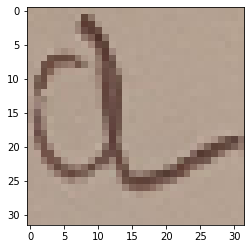

In [52]:
filename = '/home/max/Documents/AI/ocr2/Test/a.png'
test_image = image.load_img(filename, target_size = (32,32))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

In [53]:
result = model.predict(test_image)
result = get_result(result)
print ('Predicted Alphabet is: {}'.format(result))

Predicted Alphabet is: o
